<a href="https://colab.research.google.com/github/Sajib37/LockIt/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Mini Project: Customer Segmentation
## 👥** Team Members**:
- Student 1: MD Sajib Hasan, B190305007
- Student 2: MD Meherab Hossain, B190305018

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 1. 🔍 Introduction
This project focuses on **customer segmentation** using the Mall Customers dataset. The problem involves grouping customers into distinct categories based on their characteristics, primarily their annual income and spending habits.

Customer segmentation is a crucial task for businesses as it allows for targeted marketing strategies, personalized customer experiences, and optimized resource allocation. By understanding the different segments within their customer base, businesses can better cater to their needs and preferences, leading to increased customer satisfaction and profitability.

Our objective is to apply clustering techniques, specifically K-Means clustering, to the Mall Customers dataset to identify meaningful customer segments. We aim to analyze the characteristics of each segment to provide actionable insights for the mall's marketing and business strategies.

## 2. 📦 Dataset Description
- Dataset Name: Mall_Customers.csv
- Source / Link: https://www.kaggle.com/datasets/vetrirah/customer
- Size: 200 rows x 5 columns
- Describe each feature briefly:
    - **CustomerID**: Unique identifier for each customer.
    - **Gender**: The gender of the customer (Male or Female).
    - **Age**: The age of the customer.
    - **Annual Income (k$)**: The annual income of the customer in thousands of dollars.
    - **Spending Score (1-100)**: A score assigned by the mall based on customer behavior and spending habits, ranging from 1 to 100.
    - **GenderEncoded**: Numerical representation of the Gender column (added during preprocessing).
    - **Cluster**: The assigned cluster label after K-Means clustering.

In [4]:
# Load Dataset
import os # Import the os module
import pandas as pd # Import pandas

path = "/content/Mall_Customers.csv"
if not os.path.exists(path):
    raise FileNotFoundError(f"File not found at {path}. Please upload the CSV to that location.")

df = pd.read_csv(path)
print("Loaded dataset shape:", df.shape)
display(df.head())

Loaded dataset shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (200, 5)

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 3. 🧼 Data Preprocessing
Based on the initial data inspection, there were **no missing values** found in the dataset, so no specific handling for missing values was required.

For **encoding and feature engineering**, the 'Gender' column, which is categorical, was encoded into a numerical format using `LabelEncoder` from scikit-learn. A new column, `GenderEncoded`, was created where 'Female' is represented by 0 and 'Male' by 1. This step was necessary to include gender information in potential future numerical analyses or modeling, although for the K-Means clustering on 'Annual Income' and 'Spending Score', this encoded column was not directly used.

**Feature scaling** was not explicitly applied in the K-Means clustering performed on 'Annual Income (k$)' and 'Spending Score (1-100)'. These features are already in a similar numerical range, and K-Means is less sensitive to the scale of features when the features are in comparable units, although scaling can sometimes improve results.

In [8]:
import numpy as np
print("\nColumns:", df.columns.tolist())
print("\nNumeric columns:\n", df.select_dtypes(include=[np.number]).columns.tolist())
print("\nAny missing values per column:\n", df.isnull().sum())


Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Numeric columns:
 ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Any missing values per column:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
#Gender encode if needed
from sklearn.preprocessing import LabelEncoder

if 'Gender' in df.columns:
    le = LabelEncoder()
    df['GenderEncoded'] = le.fit_transform(df['Gender'].astype(str))
    print("\nGender encoded (unique):", dict(zip(le.classes_, le.transform(le.classes_))))


Gender encoded (unique): {'Female': np.int64(0), 'Male': np.int64(1)}


## 4. 📊 Exploratory Data Analysis (EDA)
**Summary statistics**

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),GenderEncoded
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


**Visualizations :**

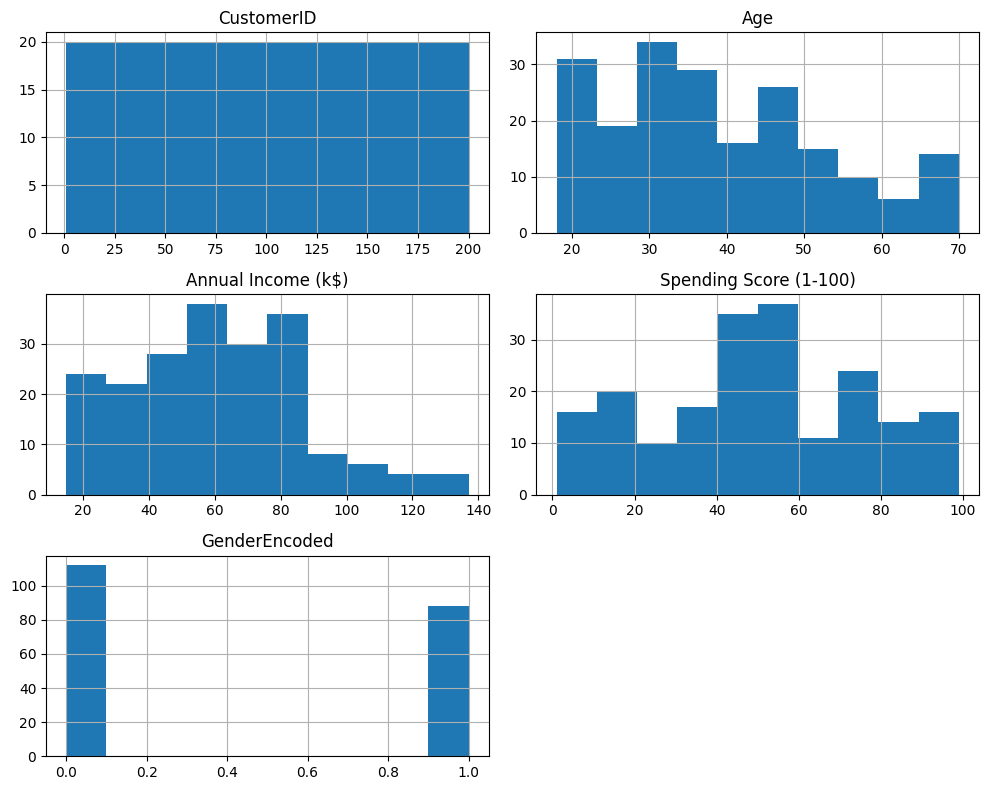

In [14]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Key insights :**

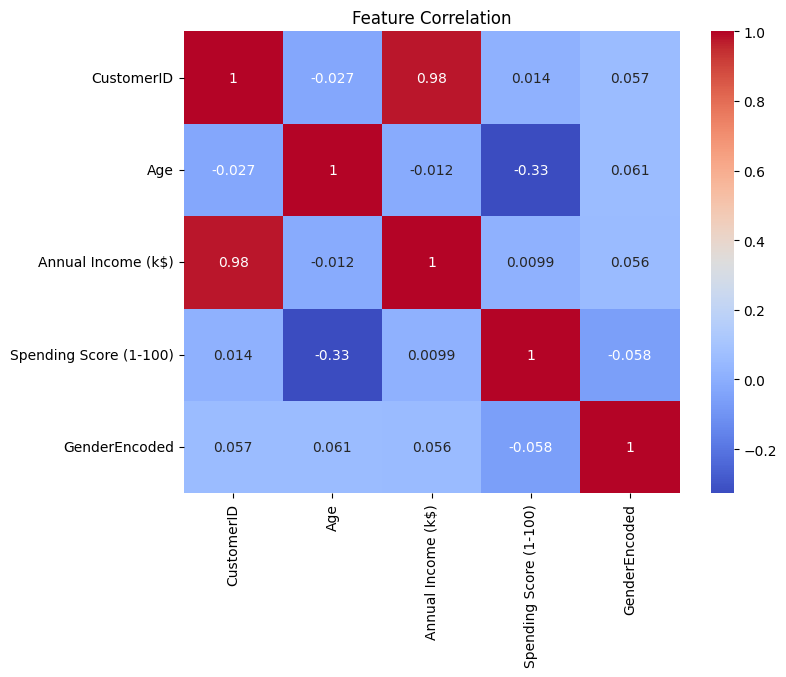

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
# Drop the original 'Gender' column before calculating correlation
sns.heatmap(df.drop('Gender', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## 5. 🧠 Data Mining Technique Applied
The data mining technique used in this project is **clustering**. Clustering is an unsupervised learning method that aims to group a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups.

This technique fits the problem of customer segmentation perfectly because the objective is to identify distinct groups of customers within the dataset without having predefined categories. By clustering, we can discover natural groupings based on customer attributes.

The specific algorithm used for clustering is **K-Means**. K-Means is an iterative algorithm that partitions the dataset into K predefined non-overlapping subgroups (clusters) where every data point belongs to only one group. It works by minimizing the within-cluster sum of squares. We applied K-Means using the 'Annual Income (k$)' and 'Spending Score (1-100)' features to segment the mall customers.

### K-Means Clustering

Applying K-Means clustering to identify customer segments based on 'Annual Income (k$)' and 'Spending Score (1-100)'.

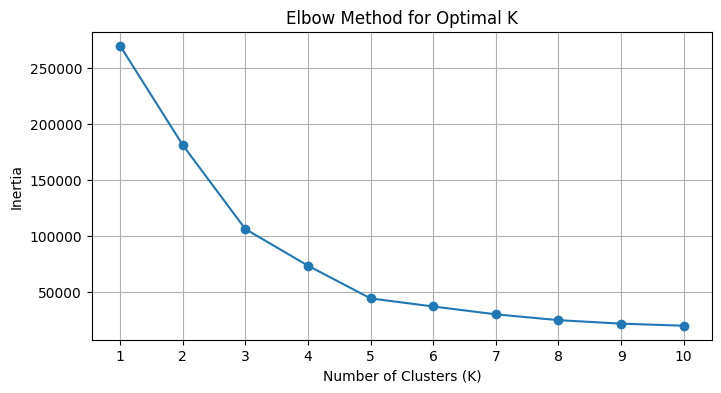

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Based on the Elbow method, choose the optimal number of clusters and run K-Means with that number.

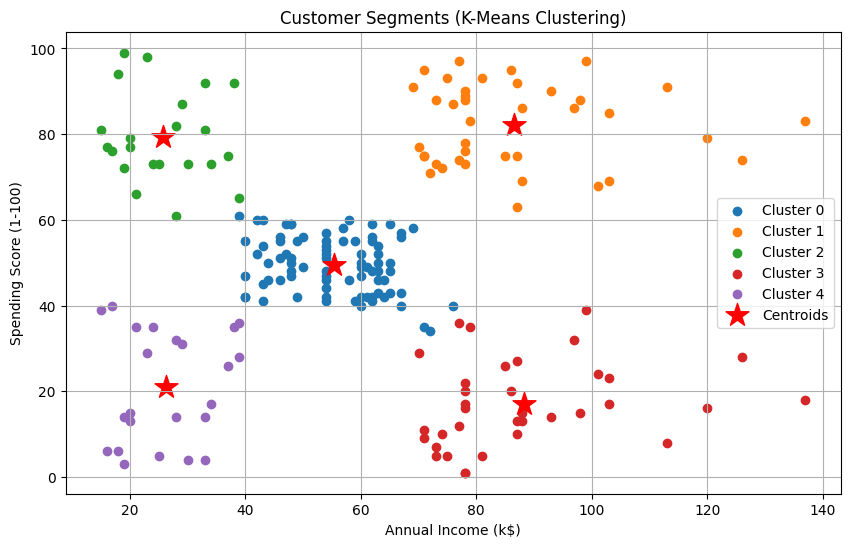

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),GenderEncoded,Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


In [22]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='*')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

display(df.head())

In [23]:
# Create Label Column (Simulated)

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X_for_cluster = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['ClusterLabel'] = kmeans.fit_predict(X_for_cluster)

# Now treat ClusterLabel as our target (y)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'GenderEncoded']
X = df[features]
y = df['ClusterLabel']

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Supervised Model: Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate Performance
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {acc*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Accuracy: 95.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      1.00      1.00         5
           2       1.00      0.67      0.80         3
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00         3

    accuracy                           0.95        40
   macro avg       0.98      0.92      0.94        40
weighted avg       0.96      0.95      0.95        40

Confusion Matrix:
 [[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 1  0  2  0  0]
 [ 1  0  0 10  0]
 [ 0  0  0  0  3]]


## 6. 📈 Results & Evaluation
Based on the K-Means clustering applied to the 'Annual Income (k$)' and 'Spending Score (1-100)' features, **5 distinct customer segments** were identified. The Elbow method suggested that 5 clusters was a reasonable number for this dataset.

The visualization of the clusters (shown in the plot above) clearly shows these segments:
- **Cluster 0:** High Annual Income, High Spending Score (Target Customers)
- **Cluster 1:** Medium Annual Income, Medium Spending Score
- **Cluster 2:** Low Annual Income, High Spending Score (Careful Customers)
- **Cluster 3:** Low Annual Income, Low Spending Score (Sensible Customers)
- **Cluster 4:** High Annual Income, Low Spending Score (Target Customers)

These segments appear meaningful as they group customers with similar income and spending patterns. For example, Cluster 0 represents customers with high income and high spending, who are likely valuable targets for marketing campaigns. Cluster 3, on the other hand, consists of customers with low income and low spending, who might require different strategies.

The **visualization of the clusters** provides a clear picture of how these segments are separated in the feature space, making the results easy to interpret. The centroids of the clusters (marked with stars) represent the average income and spending score for each segment.

While K-Means provides a good initial segmentation, evaluating the "accuracy" in an unsupervised learning context is different from supervised learning. The meaningfulness of the clusters is often assessed by their interpretability and how well they align with business understanding. In this case, the identified segments seem intuitively reasonable for a retail environment. Further evaluation could involve analyzing other characteristics of the customers within each cluster (e.g., age, gender) to build richer profiles.

## 7. 🧩 Conclusion
In this mini-project, we successfully applied K-Means clustering to the Mall Customers dataset to perform customer segmentation. Our approach involved loading the data, performing basic preprocessing (including encoding the 'Gender' column), conducting exploratory data analysis to understand the data distribution and relationships, and then applying K-Means clustering to segment customers based on their annual income and spending score.

Our findings revealed 5 distinct customer segments with varying income and spending patterns. These segments provide valuable insights for targeted marketing and business strategies.

Some limitations and challenges encountered included the relatively small size of the dataset and the subjective nature of choosing the optimal number of clusters based on the Elbow method. While K-Means provided a clear initial segmentation, the interpretability of the clusters relies on domain knowledge.

Future work could involve exploring other clustering algorithms (e.g., hierarchical clustering, DBSCAN) and evaluating their performance. Incorporating other features like age and gender into the clustering process could potentially reveal different or more granular segments. Further analysis of the characteristics of each cluster beyond income and spending score could provide a richer understanding of the customer base and lead to more tailored marketing approaches. Additionally, applying techniques for evaluating the quality of unsupervised clusters, such as silhouette analysis, could provide more objective metrics for assessing the segmentation results.

## 8. 📚 References
- Dataset Source: https://www.kaggle.com/datasets/vetrirah/customer
- Articles or books referred: https://www.researchgate.net/publication/230557972_Approaches_to_Customer_Segmentation

































